# Distribuciones Cambiantes

In [50]:

import numpy as np
import pandas as pd
from scipy.stats import beta

# Paso 0: parámetros
n_activos = 12  # Número de activos
periodos = 1825  # Número de días (365 días hábiles en un año) 4 AÑOS
ventana_adts = 121  # Cada cuántos días cambia la media

# Generar fechas para todo un año con días hábiles
fechas = pd.date_range('1974-01-01', periods=periodos)

# Inicializar matrices para los retornos y para las medias verdaderas
data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

# Definir intervalos específicos para las medias de cada activo
# Cada activo tiene un rango único de distribución uniforme
intervalos_uniformes = [
    (-1, 1),    # Activo 1
    (-2, 2),     # Activo 2
    (-2, 0),    # Activo 3
    (-1, 3),     # Activo 4
    (-0.5, 0.5), # Activo 5
    (0, 1.5),   # Activo 6
    (-1, 2),     # Activo 7
    (-2, 4),     # Activo 8
    (-3, -1),   # Activo 9
    (-0.5, 1.5), # Activo 10
    (-1.5, -0.5), # Activo 11
    (-3, 3)      # Activo 12
]

# Generación de los datos
for t in range(periodos):
    # Cambiar las medias cada ventana_adts días
    if t % ventana_adts == 0:
        medias_fijas = np.array([
            np.random.uniform(low, high) for low, high in intervalos_uniformes
        ])
    
    # Generar los retornos con una distribución normal centrada en las medias actuales
    data[t, :] = np.random.normal(loc=medias_fijas, scale=1, size=n_activos)

    # Registrar las medias verdaderas para cada activo
    medias_reales[t, :] = medias_fijas

# Crear DataFrames de los retornos y las medias reales
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])

In [51]:
df_medias

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-01 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-02 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-03 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-04 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-05 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
...              ...       ...       ...       ...       ...       ...   
1978-12-26 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-27 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-28 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-29 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-30 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  
1974-01-01 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-02 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-03 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-04 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-05 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
...              ...       ...       ...        ...        ...        ...  
1978-12-26  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-27  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-28  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-29  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-30  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  

[1825 rows x 12 columns]

# Distribuciones Estacionarias (Ya no correr)

In [52]:
#n_activos = 44  # Número de activos
#periodos = 1825  # Este es T: Número de días (365 días hábiles en un año) 4 AÑOS
#ventana_adts = 121  # Cada cuántos días cambia la media

# Generar fechas para todo un año con días hábiles
#fechas = pd.date_range('1974-01-01', periods=periodos)

# Inicializar matrices para los retornos y para las medias verdaderas
#data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
#medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

# Generar los retornos con medias dinámicas y registrar las medias reales
#for t in range(periodos):
    # Cambiar la media cada ventana_adts días
#    if t % ventana_adts == 0:
        # Crear nuevas medias entre -1 y 1 para cada activo
#        medias_actuales = np.random.uniform(-1, 1, n_activos)

    # Generar los retornos con una distribución normal centrada en las medias actuales
#    data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)

    # Registrar las medias verdaderas para cada activo
#    medias_reales[t, :] = medias_actuales

# Crear DataFrames de los retornos y las medias reales
#df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
#df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])


In [53]:
df_medias

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-01 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-02 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-03 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-04 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
1974-01-05 -0.103157  0.429411 -0.211335  1.764179 -0.136557  0.966106   
...              ...       ...       ...       ...       ...       ...   
1978-12-26 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-27 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-28 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-29 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   
1978-12-30 -0.625618  0.978899 -0.609820 -0.744998 -0.156431  0.734900   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  
1974-01-01 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-02 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-03 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-04 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
1974-01-05 -0.861884  2.604159 -2.414532   0.862584  -1.443818  -1.559806  
...              ...       ...       ...        ...        ...        ...  
1978-12-26  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-27  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-28  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-29  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  
1978-12-30  1.158347  3.455832 -1.938444  -0.023696  -0.992158   0.660032  

[1825 rows x 12 columns]

In [54]:
df

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-01 -1.825370 -0.725344 -1.213999  0.071301 -0.335059 -0.391424   
1974-01-02  0.398749  1.998453 -1.412535  1.304132 -1.021971  2.085113   
1974-01-03 -0.015733  0.112204  0.106893  1.715989 -0.215198  1.700723   
1974-01-04 -1.035633  0.830432 -0.308396  0.909457 -0.890836  1.490061   
1974-01-05 -0.324562 -0.757089  1.083099  0.722382  0.925461 -0.618640   
...              ...       ...       ...       ...       ...       ...   
1978-12-26 -0.794462  0.209324 -0.724433 -1.310333 -1.472923  1.193839   
1978-12-27 -0.722371  1.176609 -0.714488 -0.729314 -0.107321  0.643179   
1978-12-28  0.869083  3.329308 -0.905077 -1.271675 -0.727183  1.578448   
1978-12-29 -1.116558  0.491821  1.410770 -2.192180 -1.338623 -0.127596   
1978-12-30 -0.504662 -0.103725  0.461325 -1.085762 -1.123498  1.080175   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  
1974-01-01  0.353805  2.971879 -1.089438  -0.225108  -1.153454  -1.531340  
1974-01-02 -0.136710  1.228524 -2.516415   2.038275  -1.556701  -2.506238  
1974-01-03 -0.707937  2.521755 -1.969543   1.672459   0.440907   0.342387  
1974-01-04  0.199592  3.269963 -1.837569   0.575466  -1.099240  -1.372167  
1974-01-05 -1.914781  3.227456 -2.645259   0.656215  -3.056437  -2.105865  
...              ...       ...       ...        ...        ...        ...  
1978-12-26  1.710883  5.287476  0.078750  -0.430693  -0.825518   1.088456  
1978-12-27  0.147740  4.091992 -2.474648   0.192371  -2.454491   1.604047  
1978-12-28  0.113687  4.123379 -0.997491   0.002673  -0.578927   0.676039  
1978-12-29  1.618089  4.349192 -2.184798   0.399211  -0.056641   1.183251  
1978-12-30  1.081166  3.819574 -3.472796   0.374089  -2.705360   2.737766  

[1825 rows x 12 columns]

In [66]:
# Definimos la función de Thompson Sampling Adaptado con Descuento
resultado_df = df
resultado_df_verdad = df_medias

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T). 

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario = returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos = []  # Almacenar los eventos (1 si la acción fue correcta)

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t = returns_binario.iloc[0:t, k]  # Retorna lo más que pueda
            else:
                ventana_reward_t = returns_binario.iloc[t-w:t, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero(ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values) - alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k]) / 2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderación
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):  # Actualizo tanto el que disparó como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] = gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Definir las simulaciones
n_simulaciones = 200
gamma = 0.9  # Facor de descuento
w = 30  # Tamaño de la ventana deslizante
regrets_totales = []  # Lista para almacenar los regrets de todas las simulaciones
returns=resultado_df
# Ejecutar 30 simulaciones
for sim in range(n_simulaciones):
    print(f"Simulación {sim + 1}/{n_simulaciones}")   
    
    # Ejecutar el algoritmo
    actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

    print("Portafolios seleccionados cada día:", actions)
    #print("Retornos observados:", observed_rewards)
    print("eventos:", eventos)
    numero_de_unos = eventos.count(1)
    print(" numero aciertos:", numero_de_unos)
    
    regrets = []

    # Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
    for x in range(len(resultado_df_verdad)):
        action_tomada = actions[x]
        
        # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
        reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
        
        # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
        columnas_interes = [col for col in resultado_df_verdad.columns if 'Activo' in col]
        
        # Calcular el máximo entre las columnas seleccionadas para esa fila
        maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
        
        # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
        regret = maximo_reward - reward_obtenido
        regrets.append(regret)

    # Almacenar los regrets de la simulación actual
    regrets_totales.append(regrets)

# Convertir la lista de regrets en un DataFrame para análisis
regrets_df = pd.DataFrame(regrets_totales)

# Mostrar los regrets promedio de las 30 simulaciones
regrets_promedio = regrets_df.mean(axis=0)
print("\nRegrets promedio de las 30 simulaciones:")
print(regrets_promedio)


Simulación 1/200
Portafolios seleccionados cada día: [np.int64(11), np.int64(11), np.int64(11), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int6

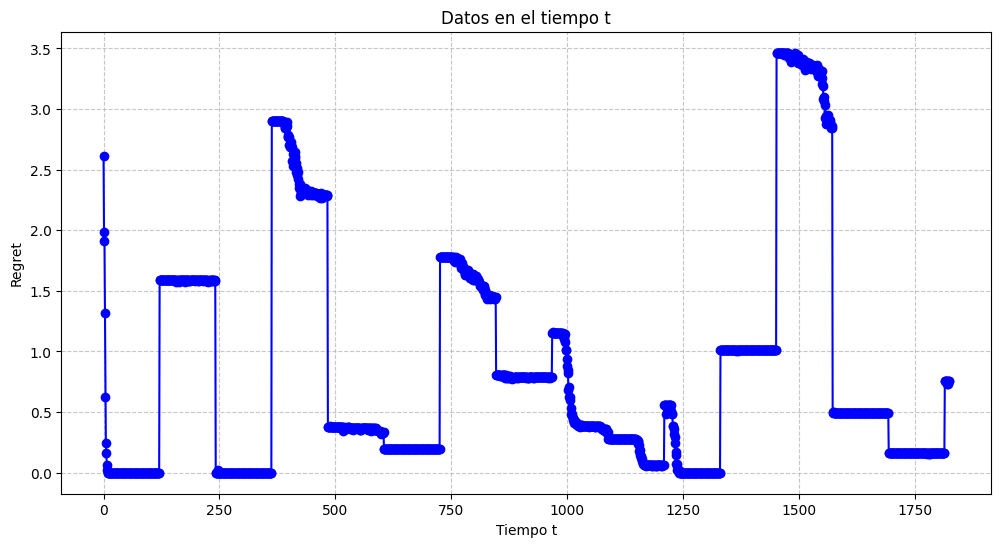

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedio)),regrets_promedio , marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


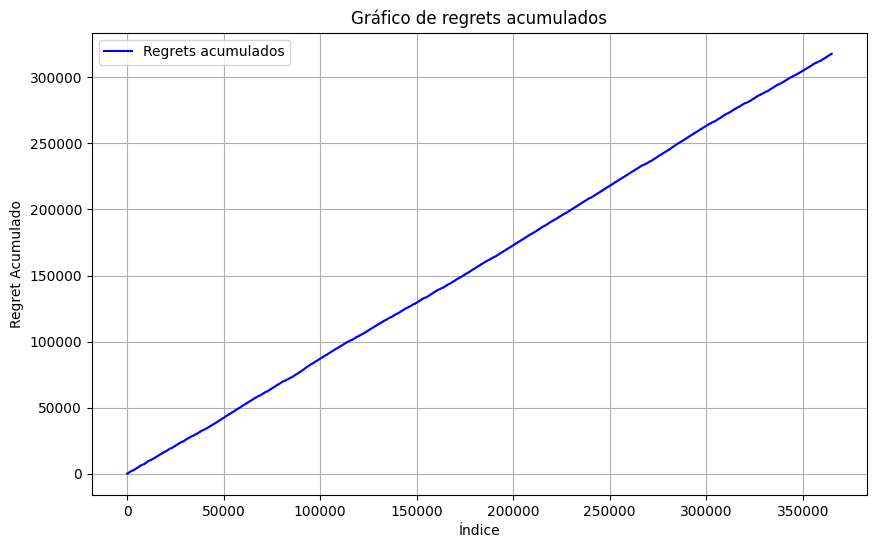

In [68]:
# Calcular el acumulado
regrets_acumulado = np.cumsum(regrets_totales)

# Graficar el acumulado
plt.figure(figsize=(10, 6))
plt.plot(regrets_acumulado, label="Regrets acumulados", color='b')
plt.title("Gráfico de regrets acumulados")
plt.xlabel("Índice")
plt.ylabel("Regret Acumulado")
plt.grid(True)
plt.legend()
plt.show()

In [69]:
ventana = 121
regrets_promedios_sim = [np.mean(regrets_promedio[i::ventana-1]) for i in range(ventana-1)]
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedios_sim)), regrets_promedios_sim, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

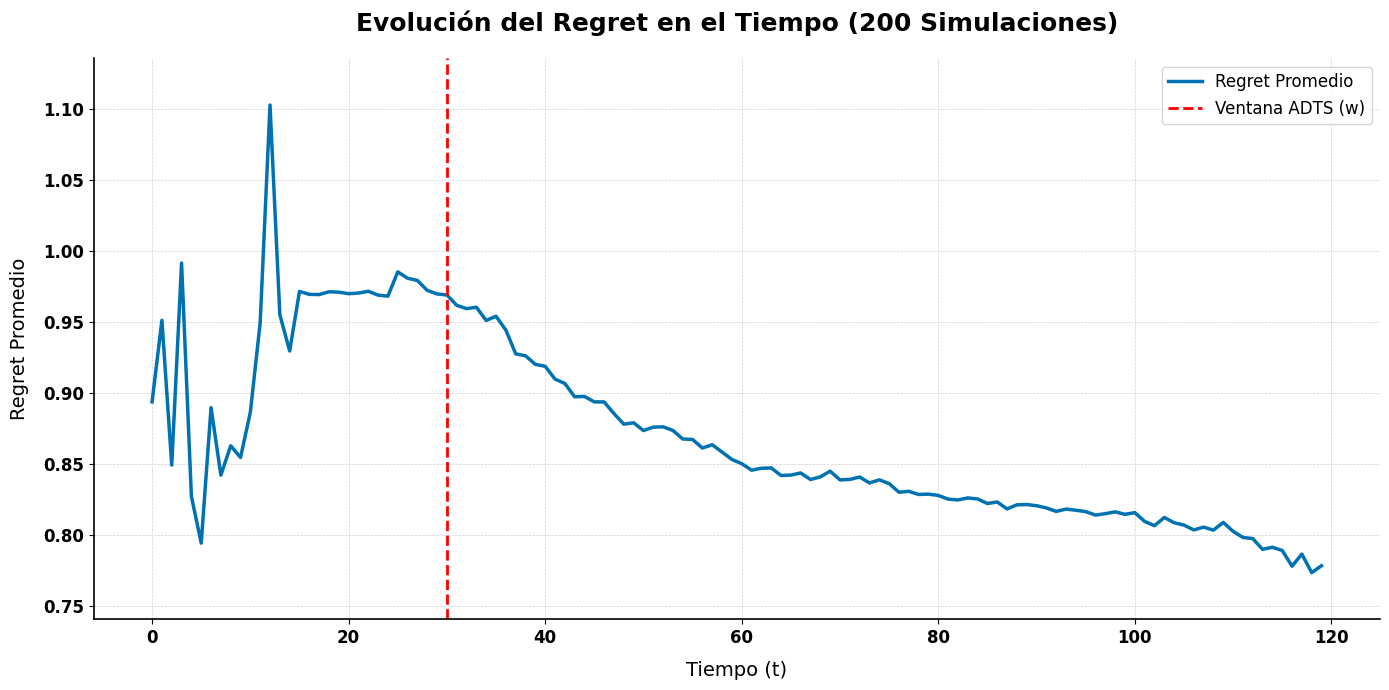

In [ ]:
plt.figure(figsize=(14, 7))

# Plotting with enhanced styling
plt.plot(
    range(len(regrets_promedios_sim)),
    regrets_promedios_sim,
    linestyle='-',  # Continuous line
    linewidth=2.5,  # Thicker line for better visibility
    color='#0072B2',  # Aesthetic color
    label='Regret Promedio'
)

# Adding a red dashed vertical line at time = 30 with the updated legend
plt.axvline(x=30, color='red', linestyle='--', linewidth=2, label="Ventana ADTS (w)")

# Enhancing title and labels
plt.title("Evolución del Regret en el Tiempo (200 Simulaciones)", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Tiempo (t)", fontsize=14, labelpad=10)
plt.ylabel("Regret Promedio", fontsize=14, labelpad=10)

# Grid enhancements
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Styling ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Adding a border for better aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# Adding margin to the plot
plt.margins(x=0.05, y=0.1)

# Adjust layout for better spacing
plt.tight_layout()

# Add the legend with the updated label
plt.legend(fontsize=12)

# Save and show the plot
plt.savefig("Regret_por_tVentana.png", format='png', dpi=700)
plt.show()


In [73]:
len(regrets_acumulado)

365000

In [74]:
regrets_promedio = regrets_df.mean(axis=0)
regrets_promedio
regrets_acumulado = np.cumsum(regrets_promedio)

In [75]:
regrets_df

0         1         2         3         4         5         6     \
0    4.163965  4.163965  4.163965  0.000000  0.000000  0.000000  0.000000   
1    4.163965  0.839980  1.741574  2.815493  0.000000  0.000000  0.000000   
2    4.163965  0.000000  0.839980  0.000000  0.000000  0.000000  0.000000   
3    2.815493  5.018691  5.018691  3.466042  0.000000  0.000000  0.000000   
4    2.740716  2.815493  1.638053  2.707316  2.815493  2.740716  5.018691   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.741574  2.707316  0.000000  2.815493  0.000000  0.000000  1.638053   
196  4.047977  4.047977  3.466042  0.000000  0.839980  0.000000  0.000000   
197  4.047977  0.839980  0.839980  0.000000  0.000000  0.000000  0.000000   
198  1.638053  0.000000  1.638053  0.000000  1.638053  1.638053  0.000000   
199  4.047977  2.815493  1.638053  1.638053  2.815493  0.000000  0.000000   

         7     8     9     ...  1815  1816  1817  1818  1819  1820  1821  \
0    0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1    0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2    0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3    0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4    0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
..        ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
195  0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
196  0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
197  0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
198  0.000000   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
199  5.018691   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     1822  1823  1824  
0     0.0   0.0   0.0  
1     0.0   0.0   0.0  
2     0.0   0.0   0.0  
3     0.0   0.0   0.0  
4     0.0   0.0   0.0  
..    ...   ...   ...  
195   0.0   0.0   0.0  
196   0.0   0.0   0.0  
197   0.0   0.0   0.0  
198   0.0   0.0   0.0  
199   0.0   0.0   0.0  

[200 rows x 1825 columns]

In [76]:
len(regrets_acumulado)

1825

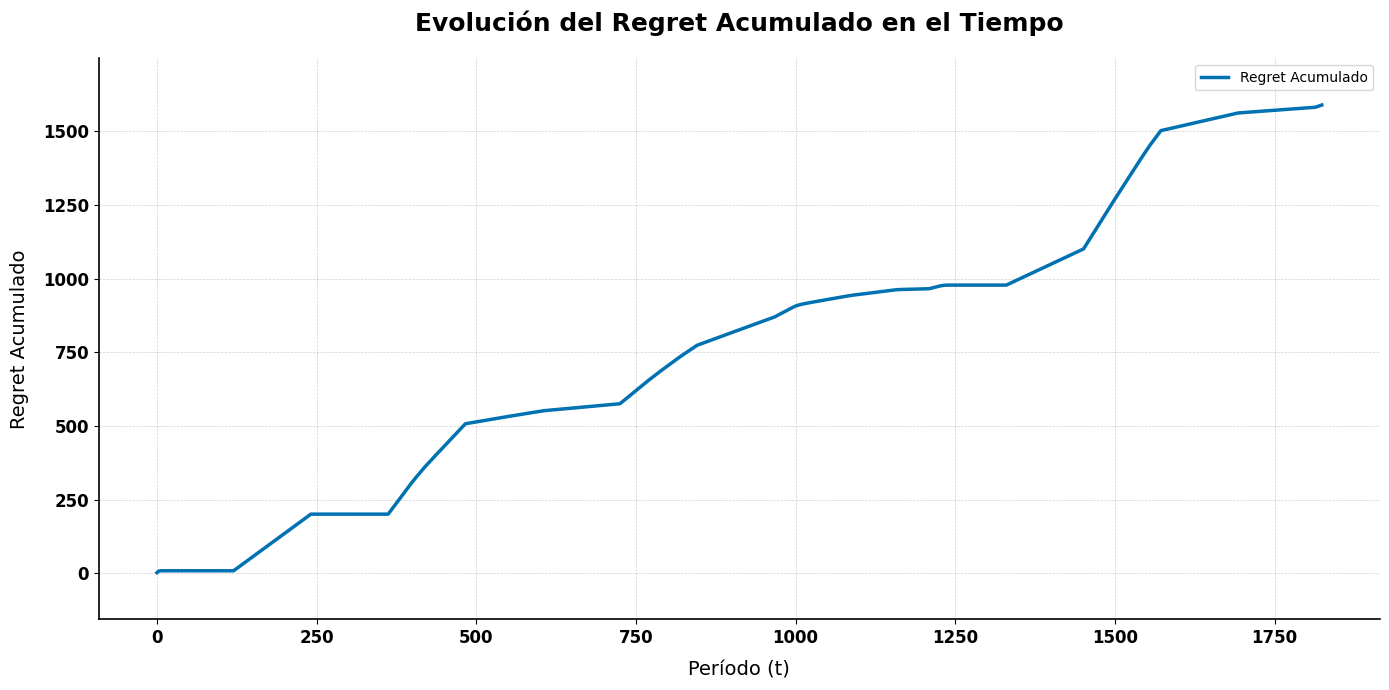

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(
    range(len(regrets_acumulado)),
    regrets_acumulado,
    linestyle='-',  # Continuous line
    linewidth=2.5,  # Thicker line for better visibility
    color='#0072B2',  # Aesthetic color similar to the second plot
    label='Regret Acumulado'
)

# Enhancing title and labels
plt.title("Evolución del Regret Acumulado en el Tiempo", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Período (t)", fontsize=14, labelpad=10)
plt.ylabel("Regret Acumulado", fontsize=14, labelpad=10)

# Grid enhancements
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Styling ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Adding a border for better aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# Adding margin to the plot
plt.margins(x=0.05, y=0.1)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.legend()
plt.savefig("Regret_Acumulado_teorico.png", format='png', dpi=700)
plt.show()
